In [1]:
import numpy as np

## Data Importation

In [2]:
import os

path = 'C:\\Users\\elitebook\\Documents\\ISI\\Rob sociale\\TP1\\Kismet_data_intent'
dataset= os.listdir(path)

In [93]:
def grad(t, x): 
    
    grad = np.empty(x.shape[0])
    for i in range(x.shape[0]):
        if (i ==0):
            grad[i] = x[i]
        else:
            grad[i] = (x[i] - x[i-1])/ (t[i] - t[i-1])
    return grad

### TOUT LE SIGNAL

In [148]:
f_data= np.empty(3) 
en_data = np.empty(3) 
f_func = np.empty(9) 
en_func = np.empty(9) 

In [149]:
for file in dataset: 
    if "ap" in file:
        data_path = os.path.join(path, file)
        f = open(data_path, "r")
        a = np.loadtxt(f)
        
        data = np.hstack([a, np.ones((a.shape[0], 1))])
        
        mean = np.mean(a[:,1], axis=0)
        maximum = a[:,1].max()
        rang = a[:,1].max() - a[:,1].min() 
        var = np.var(a[:,1], axis=0)
        median = np.median(a[:,1], axis=0)
        quan1 = np.percentile(a[:,1], 25)
        quan3 = np.percentile(a[:,1], 75)
        #grad = np.mean(np.gradient(a[:,1], axis=0, edge_order=1))
        mgrad = np.mean(grad(a[:,0], a[:,1]))
        
        func = np.array([[mean,maximum,rang, var, median, quan1,quan3,mgrad, 1 ]])
        
        if file[-2:] == "en":
            en_data = np.vstack([en_data, data])
            en_func = np.vstack([en_func, func])
        
        if file[-2:] == "f0":
            f_data = np.vstack([f_data, data])
            f_func = np.vstack([f_func, func])
            
        
        
    if "pw" in file:
        data_path = os.path.join(path, file)
        f = open(data_path, "r")
        a = np.loadtxt(f)
        data = np.hstack([a, np.zeros((a.shape[0], 1))])
        
        
        mean = np.mean(a[:,1], axis=0)
        maximum = a[:,1].max()
        rang = a[:,1].max() - a[:,1].min() 
        var = np.var(a[:,1], axis=0)
        median = np.median(a[:,1], axis=0)
        quan1 = np.percentile(a[:,1], 25)
        quan3 = np.percentile(a[:,1], 75)
        #grad = np.mean(np.gradient(a[:,1], axis=0, edge_order=1))
        mgrad = np.mean(grad(a[:,0], a[:,1]))
        
        func = np.array([[mean,maximum, rang,var, median, quan1, quan3, mgrad, 0 ]])
        
        if file[-2:] == "en":
            en_data = np.vstack([en_data, data])
            en_func = np.vstack([en_func, func])
        
        if file[-2:] == "f0":
            f_data = np.vstack([f_data, data])
            f_func = np.vstack([f_func, func])

## PARTIE VOISEE

In [163]:
f_data= np.empty(3) 
en_data = np.empty(3) 
f_func = np.empty(9) 
en_func = np.empty(9) 

In [164]:
for file in dataset: 
    if "ap" in file:
        data_path = os.path.join(path, file)
        f = open(data_path, "r")
        a = np.loadtxt(f)
        
        mgrad = np.mean(grad(a[:,0], a[:,1]))
        
        a = np.delete(a, np.where(a[:,1]==0)[0], 0)
        data = np.hstack([a, np.ones((a.shape[0], 1))])
        
        mean = np.mean(a[:,1], axis=0)
        maximum = a[:,1].max()
        rang = a[:,1].max() - a[:,1].min() 
        var = np.var(a[:,1], axis=0)
        median = np.median(a[:,1], axis=0)
        quan1 = np.percentile(a[:,1], 25)
        quan3 = np.percentile(a[:,1], 75)
        
        
        func = np.array([[mean,maximum,rang, var, median, quan1,quan3, mgrad,1 ]])
        
        if file[-2:] == "en":
            en_data = np.vstack([en_data, data])
            en_func = np.vstack([en_func, func])
        
        if file[-2:] == "f0":
            f_data = np.vstack([f_data, data])
            f_func = np.vstack([f_func, func])
            
        
        
    if "pw" in file:
        data_path = os.path.join(path, file)
        f = open(data_path, "r")
        a = np.loadtxt(f)
        
        mgrad = np.mean(grad(a[:,0], a[:,1]))
        
        a = np.delete(a, np.where(a[:,1]==0)[0], 0)
        data = np.hstack([a, np.zeros((a.shape[0], 1))])
        
        
        mean = np.mean(a[:,1], axis=0)
        maximum = a[:,1].max()
        rang = a[:,1].max() - a[:,1].min() 
        var = np.var(a[:,1], axis=0)
        median = np.median(a[:,1], axis=0)
        quan1 = np.percentile(a[:,1], 25)
        quan3 = np.percentile(a[:,1], 75)
       
        
        func = np.array([[mean,maximum, rang,var, median, quan1, quan3, mgrad,0 ]])
        
        if file[-2:] == "en":
            en_data = np.vstack([en_data, data])
            en_func = np.vstack([en_func, func])
        
        if file[-2:] == "f0":
            f_data = np.vstack([f_data, data])
            f_func = np.vstack([f_func, func])

In [150]:
x = np.hstack([f_func[:,:-1], en_func[:,:-1]])
y = en_func[:,8]

In [151]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [159]:
a = np.where(f_data[:, 2]==0)[0]
b = np.where(f_data[:, 2]==1)[0]


In [158]:
import matplotlib.pyplot as plt

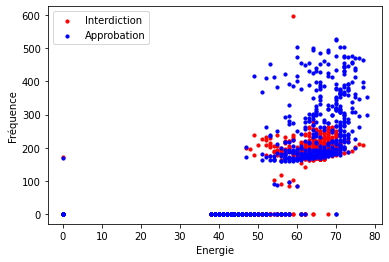

In [162]:
plt.scatter(en_data[a[:1000],1],f_data[a[:1000],1], c='red', s=10, label='Interdiction')
plt.scatter(en_data[b[:1000],1],f_data[b[:1000],1], c='blue', s=10, label='Approbation')
plt.xlabel("Energie")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


## Training 

In [152]:
# On importe le module SVM (ou autre classifieur)
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# Maintenant on peut utiliser la librairie d'optimisation gridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# On split les données en jeux de train et test (20% de données en test)
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size = 0.4, random_state = 0, stratify = y)


In [140]:
(y_train==0).sum()

113

In [129]:
from sklearn.preprocessing import StandardScaler

In [153]:
sc = StandardScaler()
sc.fit(x_train)

x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [131]:
# On définit le jeu de méta-paramètres du classifieur
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# On définit la grid search
clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5,
                       scoring='accuracy')  #'%s_macro' % score)

In [154]:
grid_params = {'n_neighbors':[3,5,11,19],
              'weights':['uniform', 'distance'],
              'metric': ['euclidiean', 'manhattan']}
clf = GridSearchCV(KNeighborsClassifier(), grid_params, verbose=1, cv=3, n_jobs=-1 )

In [155]:
# On apprend le classifieur sur la base d'entrainement
clf.fit(x_train_std, y_train)

# On print le rapport de l'apprentissage
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
from sklearn.metrics import classification_report

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters set found on development set:

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

Grid scores on development set:

nan (+/-nan) for {'metric': 'euclidiean', 'n_neighbors': 3, 'weights': 'uniform'}
nan (+/-nan) for {'metric': 'euclidiean', 'n_neighbors': 3, 'weights': 'distance'}
nan (+/-nan) for {'metric': 'euclidiean', 'n_neighbors': 5, 'weights': 'uniform'}
nan (+/-nan) for {'metric': 'euclidiean', 'n_neighbors': 5, 'weights': 'distance'}
nan (+/-nan) for {'metric': 'euclidiean', 'n_neighbors': 11, 'weights': 'uniform'}
nan (+/-nan) for {'metric': 'euclidiean', 'n_neighbors': 11, 'weights': 'distance'}
nan (+/-nan) for {'metric': 'euclidiean', 'n_neighbors': 19, 'weights': 'uniform'}
nan (+/-nan) for {'metric': 'euclidiean', 'n_neighbors': 19, 'weights': 'distance'}
0.938 (+/-0.082) for {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
0.938 (+/-0.082) for {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
0.942 (+/-0.107) f

[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    2.4s finished


In [156]:
y_pred = clf.predict(x_test_std)

In [157]:
# On importe les librairies pour l'évaluation
from sklearn.metrics import accuracy_score 

from sklearn.metrics import confusion_matrix

# On calcul le score d accuracy
acc_train=accuracy_score(y_test, y_pred)
print('L accuracy sur le jeu de test est :\n', acc_train)


L accuracy sur le jeu de test est :
 0.94
